In [1]:
%load_ext watermark


In [2]:
import sys

from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-03T19:24:53.224775+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

numpy  : 2.1.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
pandas : 2.2.3
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4812173843383789}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003966808319091797}
!!! {"init_...": 0.0020737648010253906}
!!! {"ete3Tree": 0.6787211894989014}
!!! {"GenomeTree_hierarchical": 0.0028994083404541016}
!!! {"mutateBranchETEhierarchy": 0.09528684616088867}
!!! {"write_genome_short": 0.05081915855407715}


  4%|▍         | 8/193 [00:03<00:54,  3.40it/s]

!!! {"writeGenomeNoIndels": 0.1849524974822998}
!!! {"pl.DataFrame": 0.04608917236328125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0705130100250244}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01710677146911621}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0037076473236083984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001418590545654297}
!!! {"init_...": 0.0004978179931640625}
!!! {"ete3Tree": 8.058547973632812e-05}
!!! {"GenomeTree_hierarchical": 0.002184629440307617}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 7.176399230957031

  7%|▋         | 14/193 [00:03<00:26,  6.76it/s]

!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.0005931854248046875}
!!! {"ete3Tree": 0.0008325576782226562}
!!! {"GenomeTree_hierarchical": 0.002781391143798828}
!!! {"mutateBranchETEhierarchy": 0.00013589859008789062}
!!! {"write_genome_short": 0.00013637542724609375}
!!! {"writeGenomeNoIndels": 0.00024175643920898438}
!!! {"pl.DataFrame": 0.00014090538024902344}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007439613342285156}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00027751922607421875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.337860107421875e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003060579299926758}
enter log_context_duration for

 13%|█▎        | 26/193 [00:03<00:11, 14.71it/s]

!!! {"ete3Tree": 0.0210723876953125}
!!! {"GenomeTree_hierarchical": 0.0019867420196533203}
!!! {"mutateBranchETEhierarchy": 0.004837989807128906}
!!! {"write_genome_short": 0.0027484893798828125}
!!! {"writeGenomeNoIndels": 0.0076711177825927734}
!!! {"pl.DataFrame": 0.0015308856964111328}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04204392433166504}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009415149688720703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032062530517578125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014972686767578125}
!!! {"init_...": 0.0004560947

 21%|██        | 40/193 [00:03<00:05, 26.96it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.384185791015625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034258365631103516}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011014938354492188}
!!! {"init_...": 0.0004203319549560547}
!!! {"ete3Tree": 5.9604644775390625e-05}
!!! {"GenomeTree_hierarchical": 0.002102375030517578}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.651878356933594e-05}
!!! {"writeGenomeNoIndels": 5.9604644775390625e-06}
!!! {"pl.DataFrame": 7.367134094238281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004605531692504883}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001

 24%|██▍       | 46/193 [00:03<00:04, 29.67it/s]

!!! {"ete3Tree": 0.02623271942138672}
!!! {"GenomeTree_hierarchical": 0.0020554065704345703}
!!! {"mutateBranchETEhierarchy": 0.005496025085449219}
!!! {"write_genome_short": 0.0023577213287353516}
!!! {"writeGenomeNoIndels": 0.008591413497924805}
!!! {"pl.DataFrame": 0.0016391277313232422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04902505874633789}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009894371032714844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00315093994140625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013899803161621094}
!!! {"init_...": 0.000485420227

 31%|███       | 60/193 [00:04<00:03, 41.81it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0038230419158935547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010275840759277344}
!!! {"init_...": 0.0004367828369140625}
!!! {"ete3Tree": 7.486343383789062e-05}
!!! {"GenomeTree_hierarchical": 0.002080202102661133}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 7.486343383789062e-05}
!!! {"writeGenomeNoIndels": 1.3113021850585938e-05}
!!! {"pl.DataFrame": 7.152557373046875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0048143863677978516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017547607421875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=37, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

 38%|███▊      | 74/193 [00:04<00:02, 50.49it/s]

!!! {"phastSimRun": 0.00011014938354492188}
!!! {"init_...": 0.0005285739898681641}
!!! {"ete3Tree": 5.8650970458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0021390914916992188}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 8.153915405273438e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 7.081031799316406e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005570411682128906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001804828643798828}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030765533447265625}
enter log_context_duration for

 41%|████▏     | 80/193 [00:04<00:02, 48.74it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006203413009643555}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012803077697753906}
!!! {"init_...": 0.00042366981506347656}
!!! {"ete3Tree": 0.008060932159423828}
!!! {"GenomeTree_hierarchical": 0.0020325183868408203}
!!! {"mutateBranchETEhierarchy": 0.001753091812133789}
!!! {"write_genome_short": 0.0009577274322509766}
!!! {"writeGenomeNoIndels": 0.0029773712158203125}
!!! {"pl.DataFrame": 0.0006566047668457031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.01871180534362793}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00044918060302734375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_n

 47%|████▋     | 91/193 [00:04<00:02, 39.51it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003701448440551758}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013875961303710938}
!!! {"init_...": 0.0004515647888183594}
!!! {"ete3Tree": 0.00025773048400878906}
!!! {"GenomeTree_hierarchical": 0.002547025680541992}
!!! {"mutateBranchETEhierarchy": 3.600120544433594e-05}
!!! {"write_genome_short": 8.58306884765625e-05}
!!! {"writeGenomeNoIndels": 6.914138793945312e-05}
!!! {"pl.DataFrame": 9.72747802734375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005664348602294922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000202178955078125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

 51%|█████     | 98/193 [00:05<00:02, 45.33it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034089088439941406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012421607971191406}
!!! {"init_...": 0.0004169940948486328}
!!! {"ete3Tree": 7.176399230957031e-05}
!!! {"GenomeTree_hierarchical": 0.002097606658935547}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 7.271766662597656e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 8.130073547363281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004548549652099609}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001997

 56%|█████▋    | 109/193 [00:05<00:01, 47.14it/s]

!!! {"phastSimRun": 0.00010561943054199219}
!!! {"init_...": 0.0005655288696289062}
!!! {"ete3Tree": 0.00010323524475097656}
!!! {"GenomeTree_hierarchical": 0.0025396347045898438}
!!! {"mutateBranchETEhierarchy": 1.8358230590820312e-05}
!!! {"write_genome_short": 8.702278137207031e-05}
!!! {"writeGenomeNoIndels": 2.002716064453125e-05}
!!! {"pl.DataFrame": 7.724761962890625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005673408508300781}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017690658569335938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00301361083984375}
enter log_context_duration for 

 63%|██████▎   | 122/193 [00:05<00:01, 51.57it/s]

!!! {"write_genome_short": 0.0004971027374267578}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 7.033348083496094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004924297332763672}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018334388732910156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031168460845947266}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.942054748535156e-05}
!!! {"init_...": 0.0004062652587890625}
!!! {"ete3Tree": 5.745887756347656e-05}
!!! {"GenomeTree_hierarchical": 0.0021321773529052734}
!!! {"mutateBranchETEhierarchy": 9.53674

 70%|██████▉   | 135/193 [00:05<00:01, 56.14it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036478042602539062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001308917999267578}
!!! {"init_...": 0.00048160552978515625}
!!! {"ete3Tree": 0.00019693374633789062}
!!! {"GenomeTree_hierarchical": 0.0022056102752685547}
!!! {"mutateBranchETEhierarchy": 3.600120544433594e-05}
!!! {"write_genome_short": 0.00013184547424316406}
!!! {"writeGenomeNoIndels": 5.316734313964844e-05}
!!! {"pl.DataFrame": 0.00011420249938964844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005276918411254883}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022745132446289062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifest

 74%|███████▎  | 142/193 [00:05<00:00, 58.10it/s]

!!! {"phastSimRun": 0.00010204315185546875}
!!! {"init_...": 0.0005526542663574219}
!!! {"ete3Tree": 0.00019025802612304688}
!!! {"GenomeTree_hierarchical": 0.002185344696044922}
!!! {"mutateBranchETEhierarchy": 3.790855407714844e-05}
!!! {"write_genome_short": 0.00011038780212402344}
!!! {"writeGenomeNoIndels": 5.054473876953125e-05}
!!! {"pl.DataFrame": 9.131431579589844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005770206451416016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021886825561523438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032012462615966797}
enter log_context_duration for

 77%|███████▋  | 148/193 [00:06<00:01, 43.40it/s]

!!! {"writeGenomeNoIndels": 0.011526107788085938}
!!! {"pl.DataFrame": 0.00274658203125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05806279182434082}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0015811920166015625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00925135612487793}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.0004432201385498047}
!!! {"ete3Tree": 0.024343490600585938}
!!! {"GenomeTree_hierarchical": 0.002119302749633789}
!!! {"mutateBranchETEhierarchy": 0.006160259246826172}
!!! {"write_genome_short": 0.003051280975341

 80%|████████  | 155/193 [00:06<00:00, 44.80it/s]

!!! {"ete3Tree": 0.014101505279541016}
!!! {"GenomeTree_hierarchical": 0.0019762516021728516}
!!! {"mutateBranchETEhierarchy": 0.004021406173706055}
!!! {"write_genome_short": 0.0019350051879882812}
!!! {"writeGenomeNoIndels": 0.005789279937744141}
!!! {"pl.DataFrame": 0.0011098384857177734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.031023263931274414}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006997585296630859}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030744075775146484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011968612670898438}
!!! {"init_...": 0.00043749

 83%|████████▎ | 160/193 [00:07<00:02, 11.81it/s]

!!! {"mutateBranchETEhierarchy": 0.04367637634277344}
!!! {"write_genome_short": 0.021143436431884766}
!!! {"writeGenomeNoIndels": 0.07218241691589355}
!!! {"pl.DataFrame": 0.01270437240600586}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3275723457336426}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0059909820556640625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003248929977416992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001423358917236328}
!!! {"init_...": 0.00047326087951660156}
!!! {"ete3Tree": 9.870529174804688e-05}
!!! {"GenomeTree_hierarchical": 0.002276897430419

 85%|████████▌ | 165/193 [00:07<00:01, 14.60it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006366729736328125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011563301086425781}
!!! {"init_...": 0.0004119873046875}
!!! {"ete3Tree": 0.009222030639648438}
!!! {"GenomeTree_hierarchical": 0.0020575523376464844}
!!! {"mutateBranchETEhierarchy": 0.0020601749420166016}
!!! {"write_genome_short": 0.0011513233184814453}
!!! {"writeGenomeNoIndels": 0.0034723281860351562}
!!! {"pl.DataFrame": 0.0007076263427734375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02080368995666504}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004985332489013672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=740, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

 92%|█████████▏| 178/193 [00:08<00:00, 21.87it/s]

!!! {"ete3Tree": 0.06370997428894043}
!!! {"GenomeTree_hierarchical": 0.002039670944213867}
!!! {"mutateBranchETEhierarchy": 0.015236854553222656}
!!! {"write_genome_short": 0.007581472396850586}
!!! {"writeGenomeNoIndels": 0.027225494384765625}
!!! {"pl.DataFrame": 0.008822441101074219}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12736010551452637}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.004697561264038086}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032024383544921875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013875961303710938}
!!! {"init_...": 0.00046133995056

 95%|█████████▍| 183/193 [00:08<00:00, 25.33it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0067632198333740234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010514259338378906}
!!! {"init_...": 0.00040841102600097656}
!!! {"ete3Tree": 0.008938074111938477}
!!! {"GenomeTree_hierarchical": 0.0026984214782714844}
!!! {"mutateBranchETEhierarchy": 0.002180814743041992}
!!! {"write_genome_short": 0.001216888427734375}
!!! {"writeGenomeNoIndels": 0.0036344528198242188}
!!! {"pl.DataFrame": 0.0007908344268798828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021628856658935547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005686283111572266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_n

100%|██████████| 193/193 [00:08<00:00, 23.05it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05949068069458008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001379251480102539}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032188892364501953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001404285430908203}
!!! {"init_...": 0.00045943260192871094}
!!! {"ete3Tree": 7.653236389160156e-05}
!!! {"GenomeTree_hierarchical": 0.00217437744140625}
!!! {"mutateBranchETEhierarchy": 1.1682510375976562e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 9.131431579

exit log_context_duration for extract variant
!!! {"extract variant": 0.09826874732971191}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26720213890075684}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.032346487045288086}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002724885940551758}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03305625915527344}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021257400512695312}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023734569549560547}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03291010856628418}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0026695728302001953}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 23.27it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03418540954589844}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0037097930908203125}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0022661685943603516}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03310894966125488}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034668445587158203}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002306222915649414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

100%|██████████| 7/7 [00:00<00:00, 24.27it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03359532356262207}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003748655319213867}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015170574188232422}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020412921905517578}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0029833316802978516}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3681197166442871}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2553880214691162}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 3751/3751 [00:25<00:00, 146.95it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.822092056274414}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:04<00:00, 933.53it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 112.87507939338684}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.0645453929901123}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 175.97328400611877}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009188413619995117}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003452301025390625}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003948211669921875}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.00042176246643066406}
ancestral_


100%|██████████| 368/368 [00:00<00:00, 297227.78it/s]

process mutations:   0%|          | 1/368 [00:00<01:15,  4.88it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:13<10:32,  1.76s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.2s



process mutations:  13%|█▎        | 48/368 [00:44<04:45,  1.12it/s]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   47.1s



process mutations:  24%|██▍       | 88/368 [01:16<03:56,  1.19it/s]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.3min



process mutations:  35%|███▍      | 128/368 [01:49<03:19,  1.21it/s]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  1.9min



process mutations:  46%|████▌     | 168/368 [02:21<02:43,  1.23it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.4min



process mutations:  57%|█████▋    | 208/368 [02:53<02:09,  1.23it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.0min



process mutations:  67%|██████▋   | 248/368 [03:24<01:36,  1.25it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  3.5min



process mutations:  78%|███████▊  | 288/368 [03:57<01:04,  1.24it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  4.0min



process mutations:  89%|████████▉ | 328/368 [04:29<00:32,  1.24it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  4.6min



process mutations: 100%|██████████| 368/368 [05:01<00:00,  1.22it/s]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  5.0min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.1min finished


process replicate: 100%|██████████| 1/1 [08:07<00:00, 487.25s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.07637906074523926}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '4fe980a1-568d-8e56-acc8-a6e40ac2fe7c', '4fe980a1-568d-8e56-acc8-a6e40ac2fe7c', '4fe980a1-568d-8e56-acc8-a6e40a
$ screen_name                    <cat> combined, fisher, naive, ctrl_combined, ctrl_fisher
$ phylo_df_background_len        <u16> 7388, 6272, 7388, 7476, 7447
$ phyo_df_screened_len           <u16> 114, 1230, 114, 26, 55
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, clade durat

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


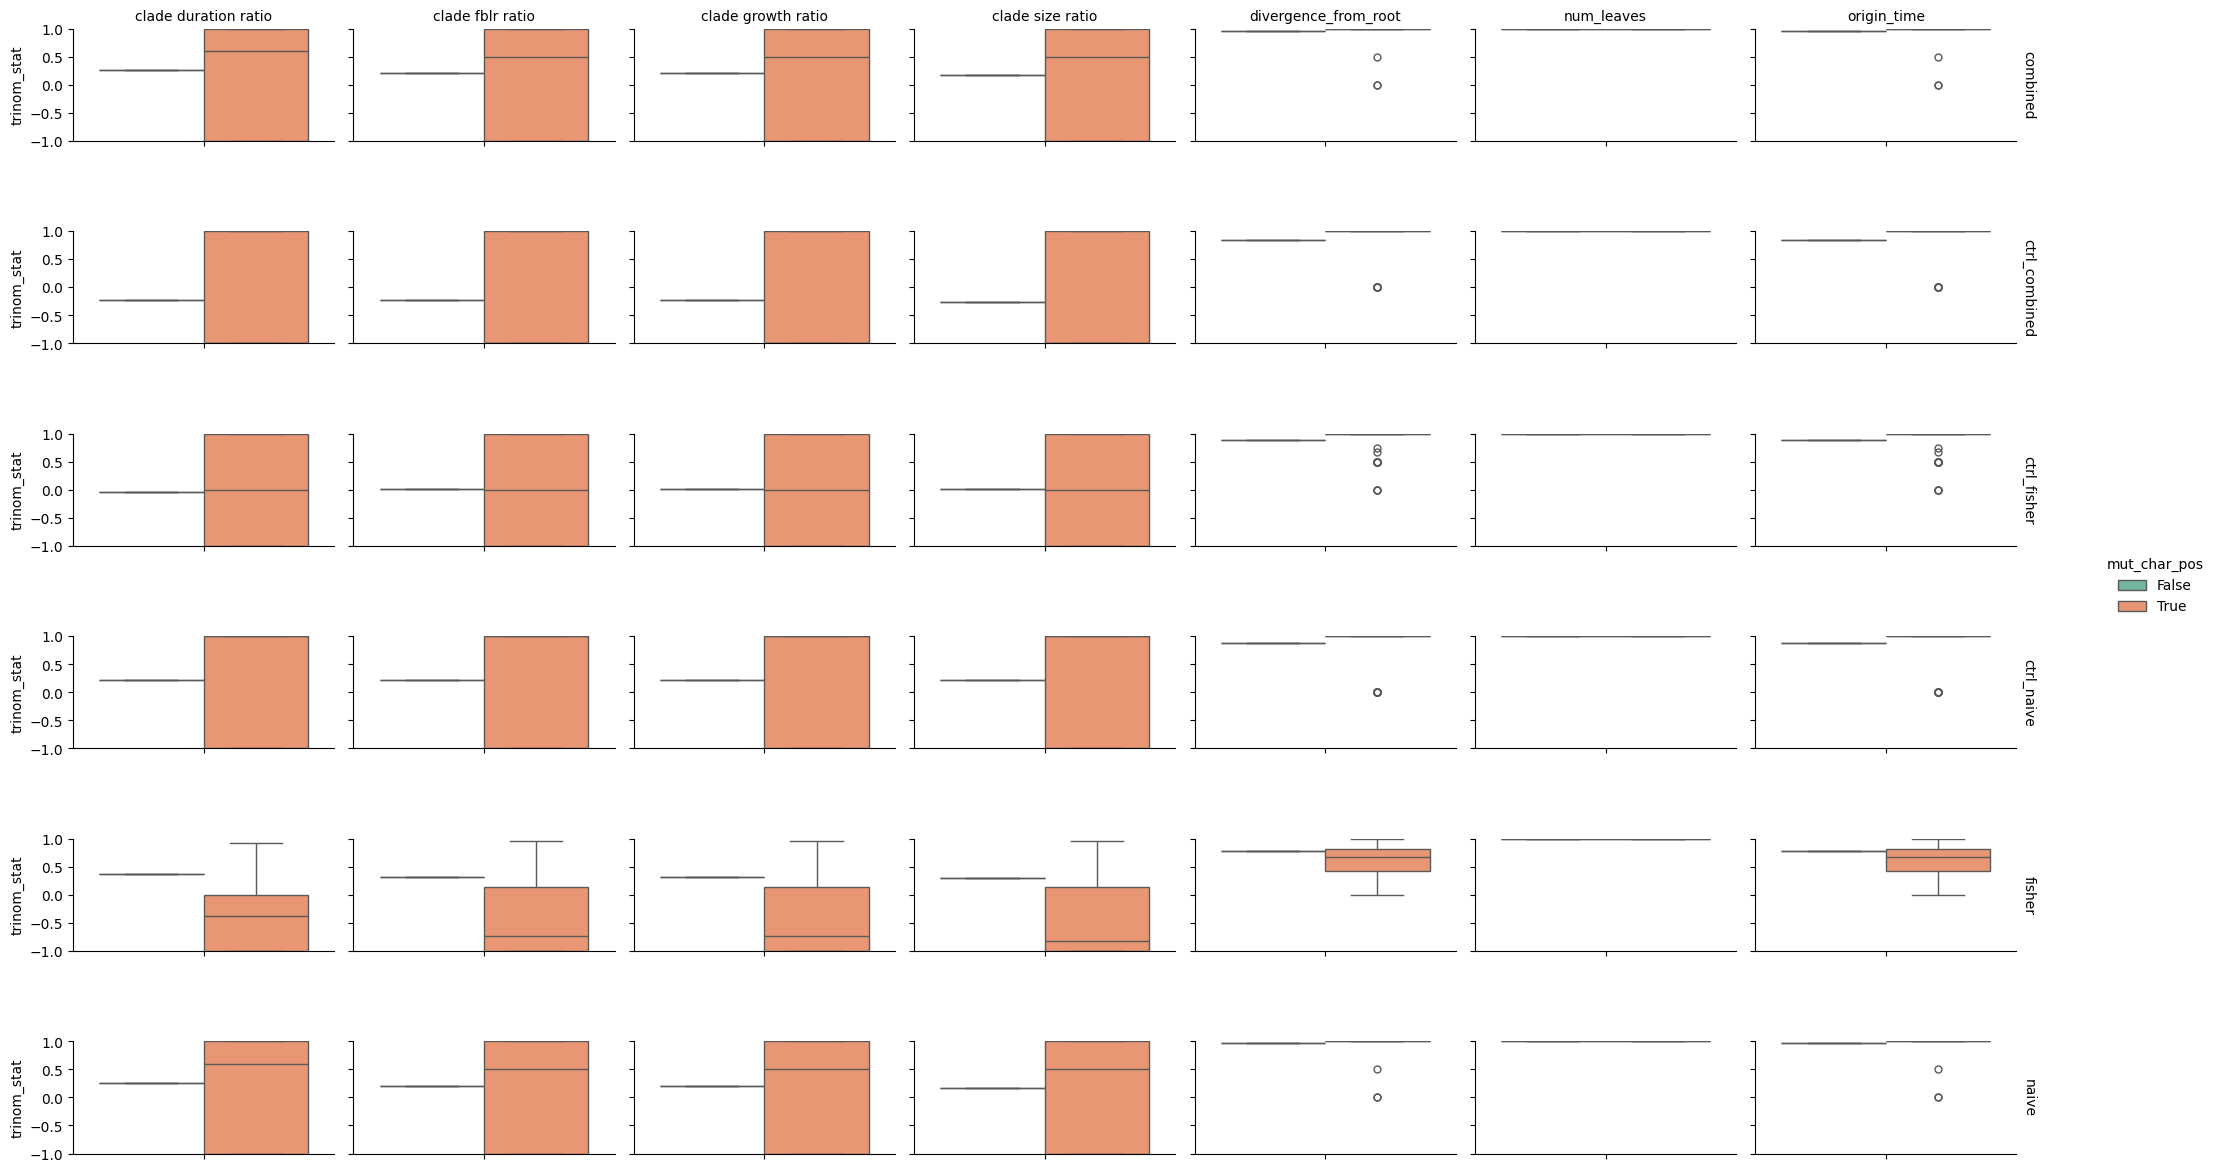

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


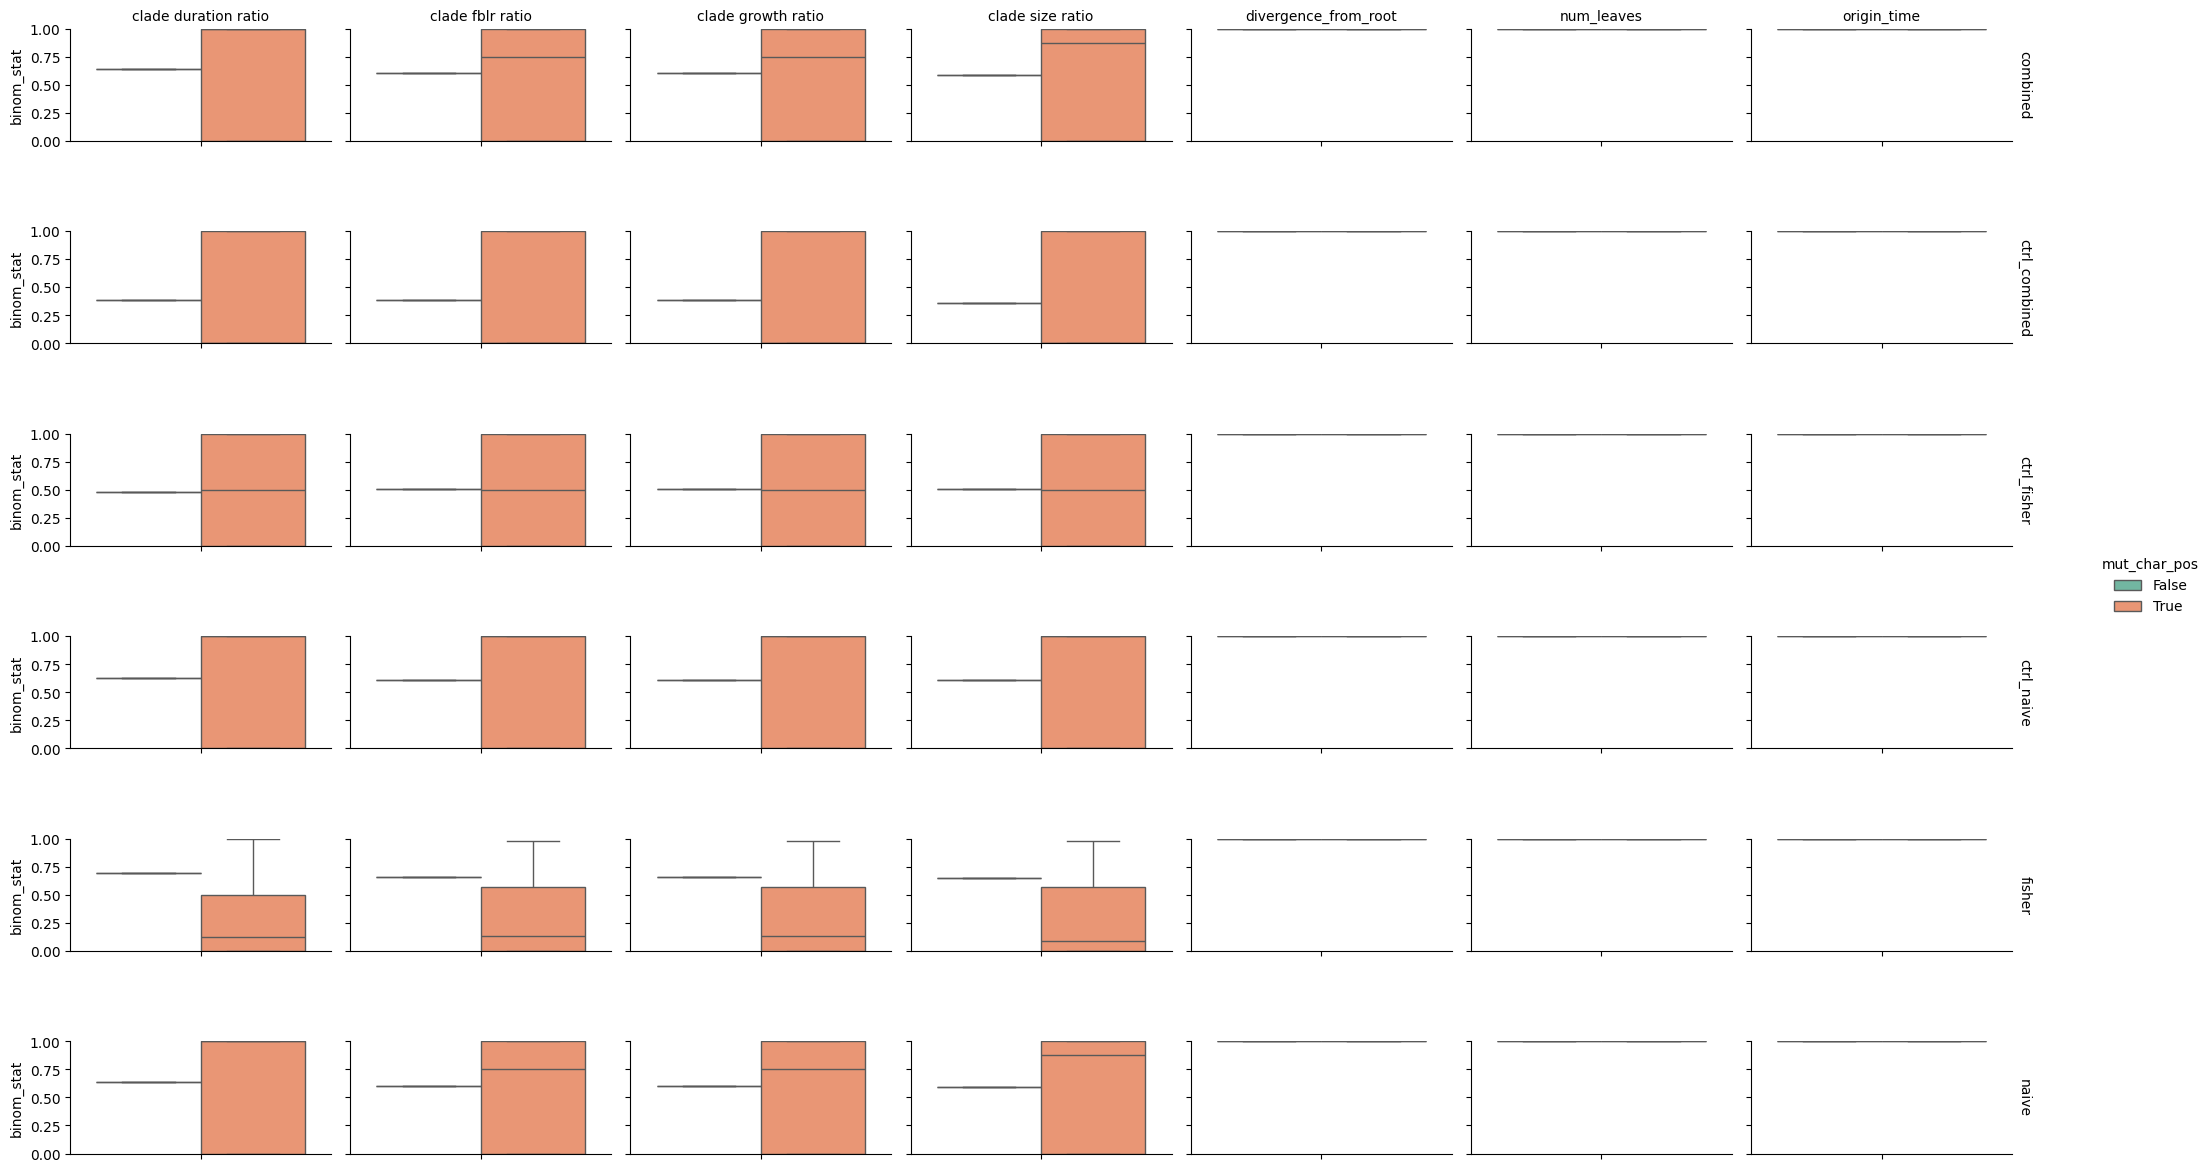

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


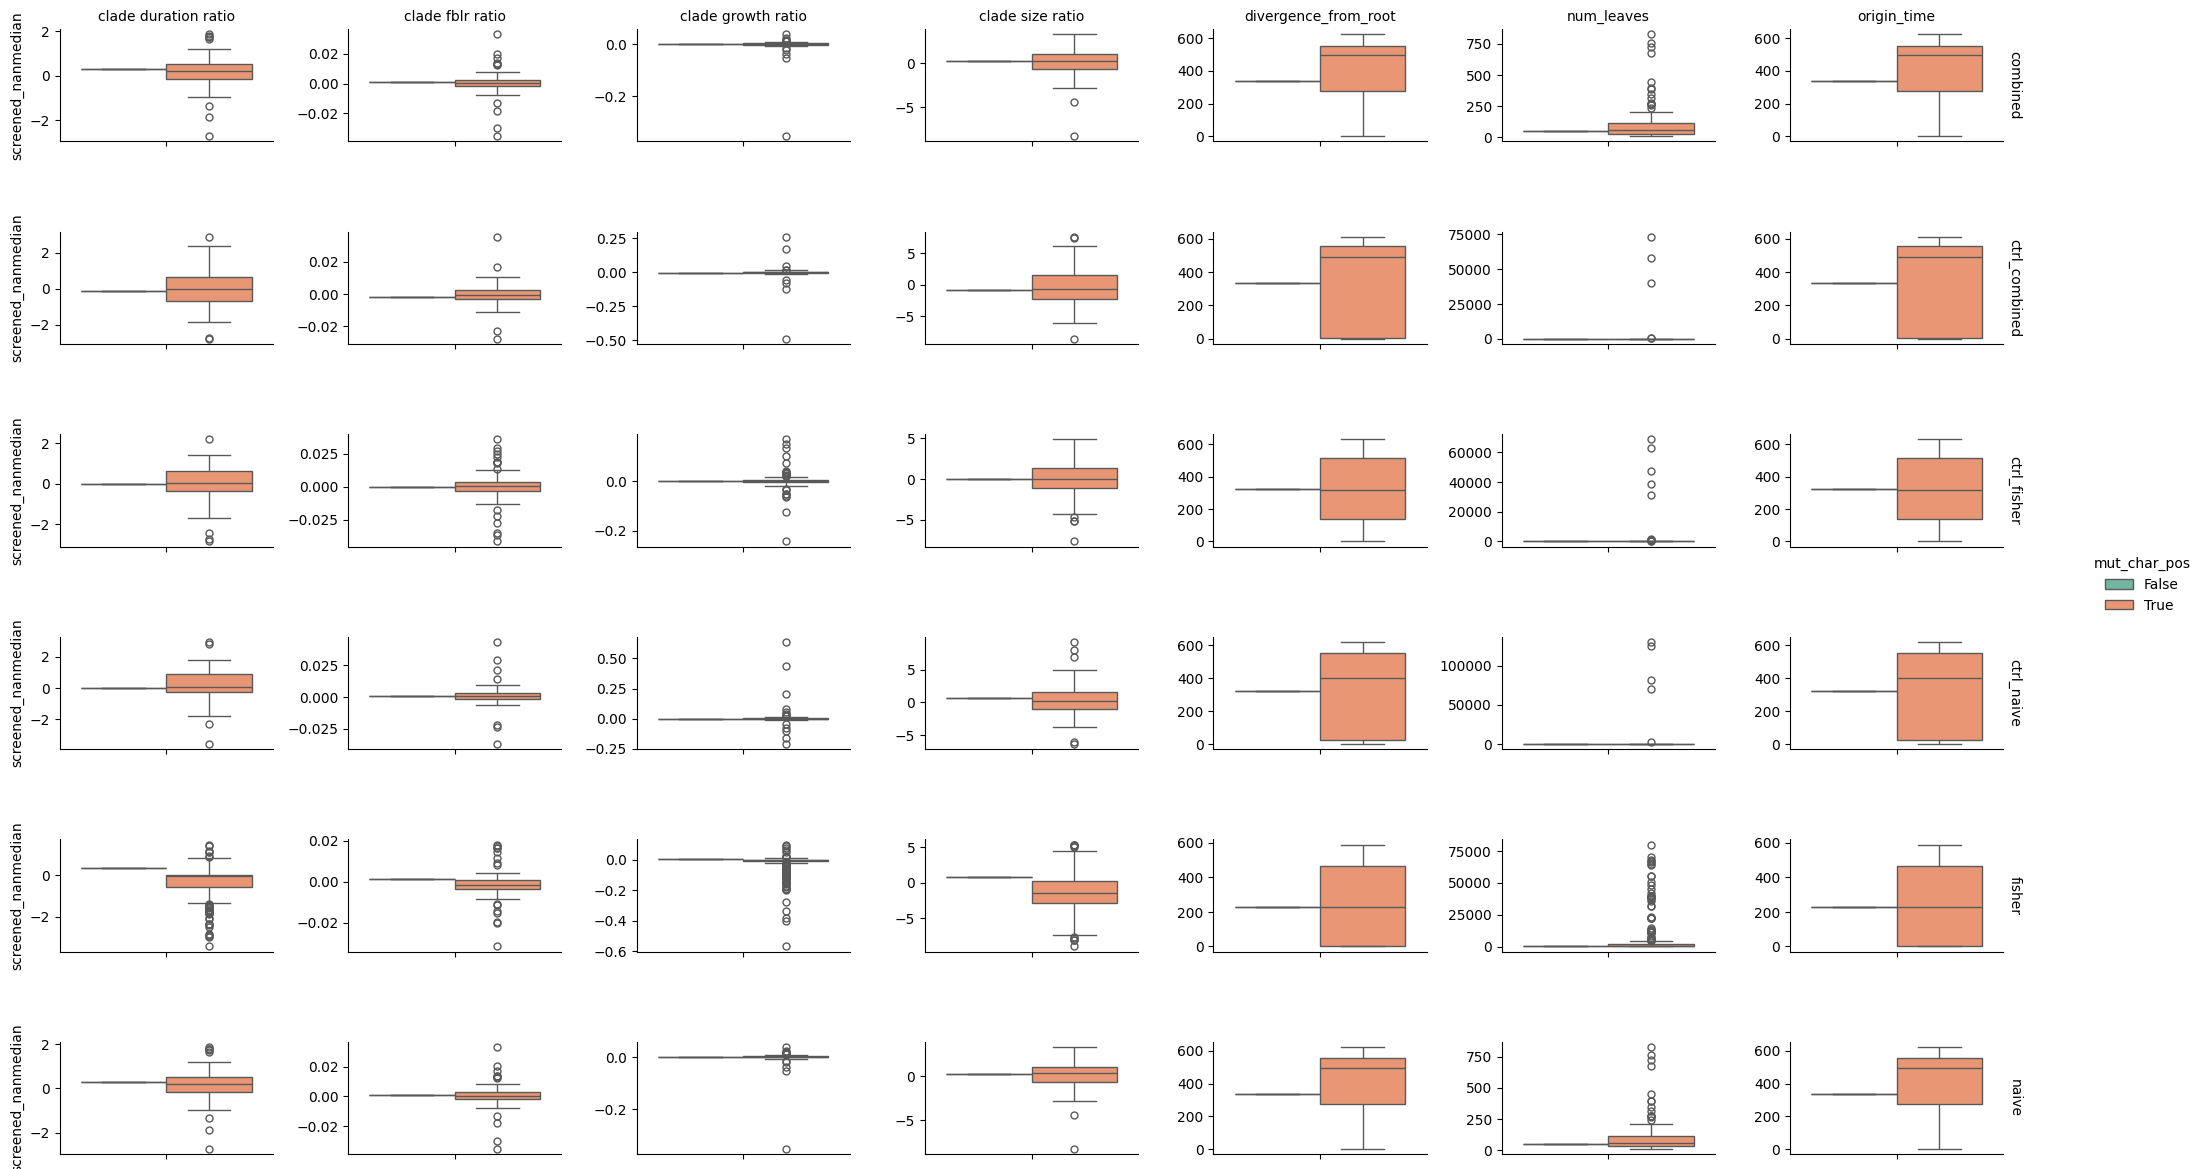

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


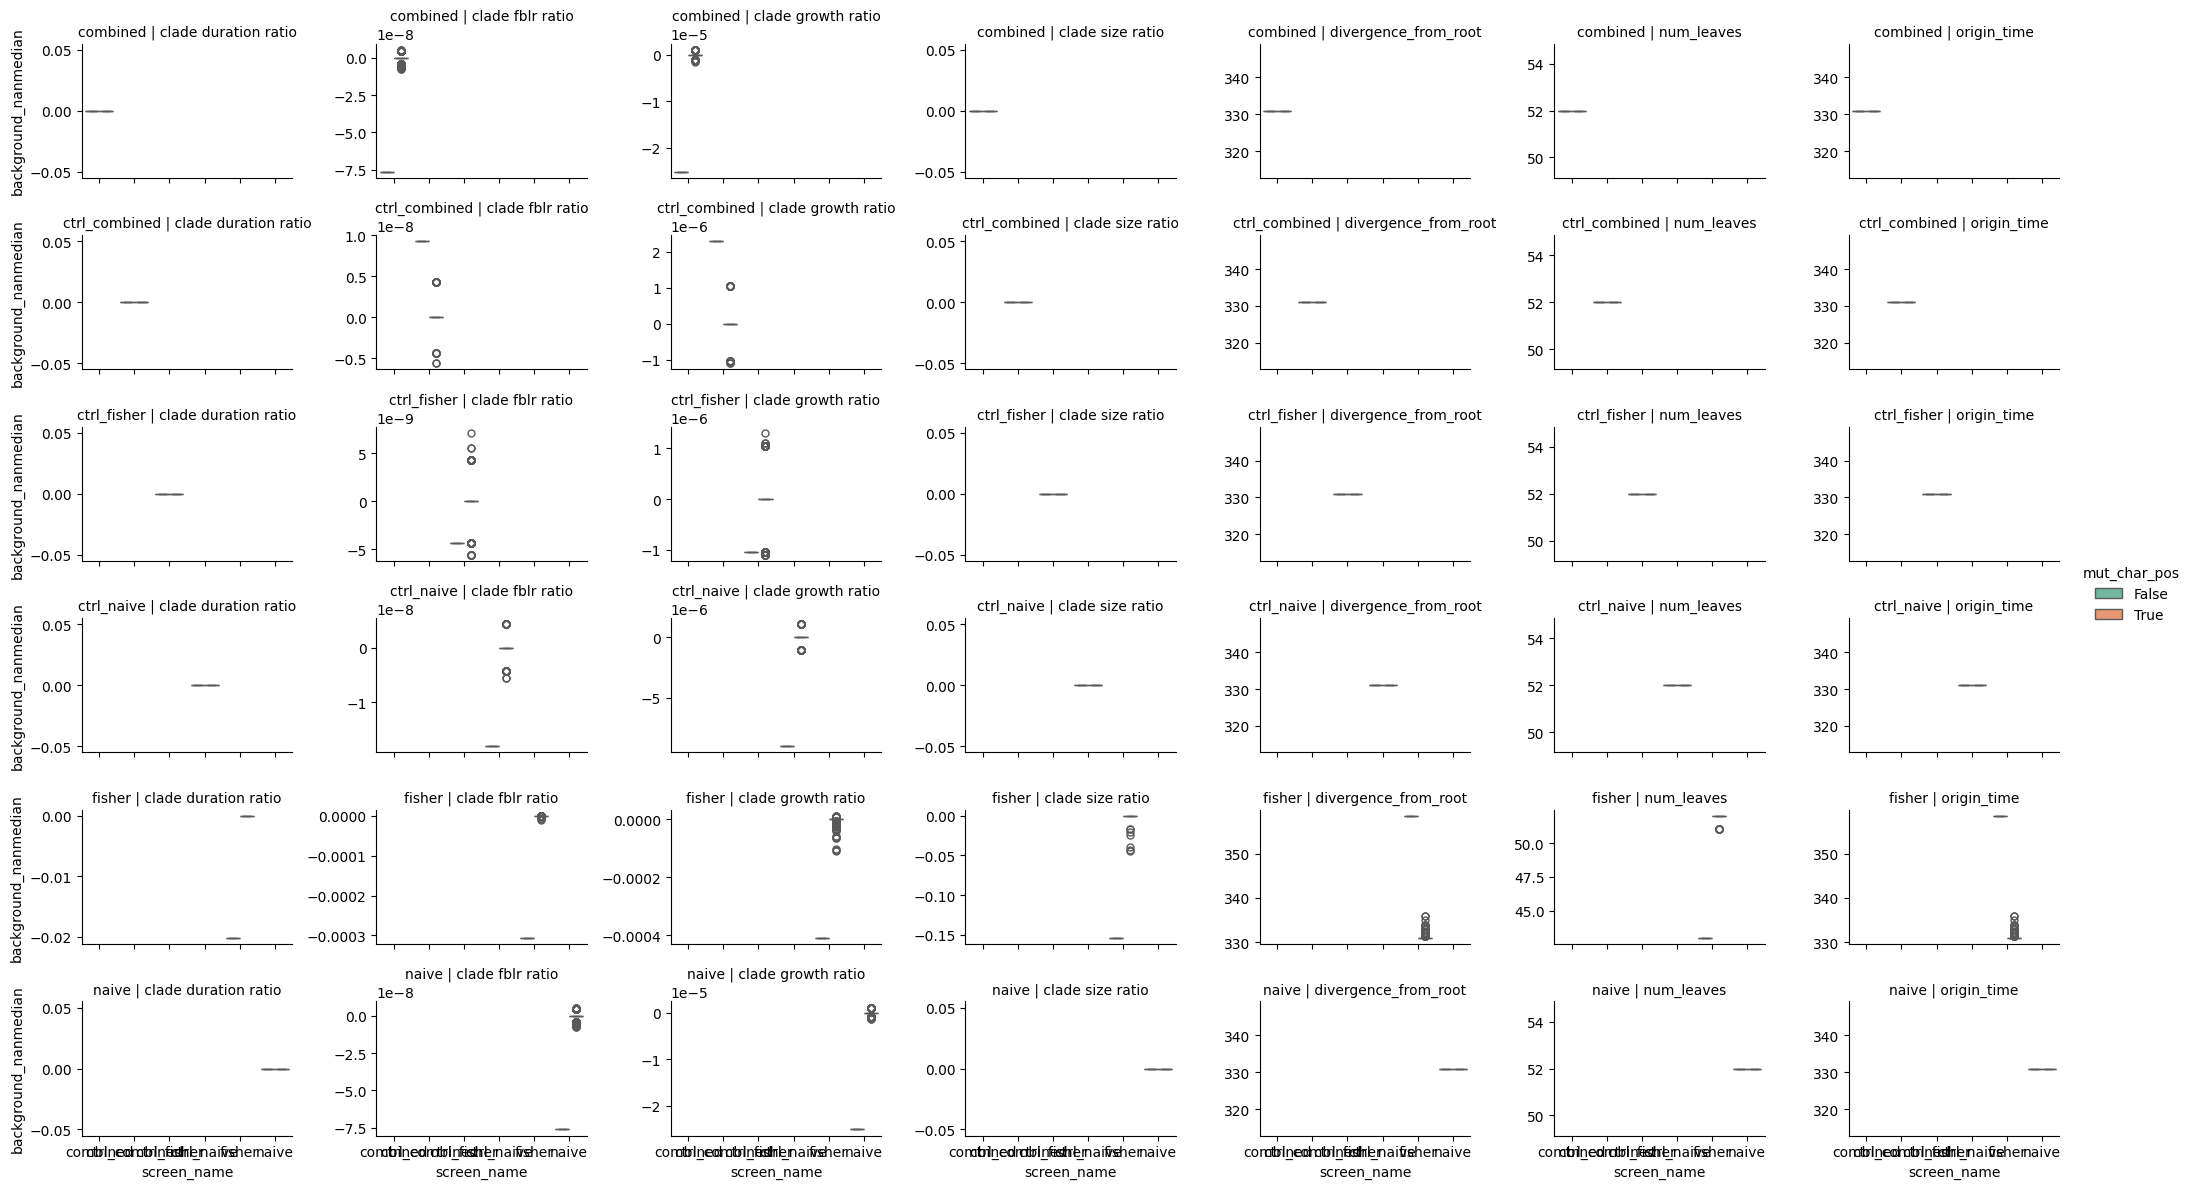

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
